# Introduction

Author:Doran Wu

Date:10/17/17

*Please run the code multiple times for some of the graphs to work*

Over the course of this lab I hope to answer three questions.

- Does average poverty rate by state correlate with number of police deaths (shootings done by police), by specific city?
- Do violent crimes and murder rates correlate with number of police deaths (shootings done by police)?
- Does the number of police deaths (shootings done by police) by city correlate with black population by city?

# About My Datasets

The datasets I will be using.

- KilledByPolice.csv
- PoliceViolence_city.csv
- statecrime.csv
- states.csv
- the thing about this dataset called states.csv, it has no headers giving no indication what each data point means, so some data cleaning should occur but that is almost impossible when you are only given state name and nothing else


# Preparing Dataset for First Question

In [8]:
#I will be using pandas to isolate my x and y values
#importing pand
import pandas as pd
#finding the file
poverty = pd.read_csv("Data Files Lab 3/statecrime.csv")
#isolating poverty column
print( poverty['poverty'])
#next its time to isolate the total number killed by police by city
citykilled = pd.read_csv("Data Files Lab 3/PoliceViolence_city.csv")
#next is to isolate that column
print(citykilled['All People Killed by Police (2013-2015)'])
#first column until stop is one for poverty next is the one for city killed

0     17.5
1      9.0
2     16.5
3     18.8
4     14.2
5     12.9
6      9.4
7     10.8
8     18.4
9     14.9
10    16.5
11    10.4
12    14.3
13    13.3
14    14.4
15    11.8
16    13.4
17    18.6
18    17.3
19    12.3
20     9.1
21    10.3
22    16.2
23    11.0
24    21.9
25    14.6
26    15.1
27    12.3
28    12.4
29     8.5
30     9.4
31    18.0
32    14.2
33    16.3
34    11.7
35    15.2
36    16.2
37    14.3
38    12.5
39    11.5
40    17.1
41    14.2
42    17.1
43    17.2
44    11.5
45    11.4
46    10.5
47    12.3
48    17.7
49    12.4
50     9.8
Name: poverty, dtype: float64
0     15
1      8
2      6
3      5
4      7
5     11
6     17
7     16
8     26
9      5
10     5
11     7
12     0
13     2
14    11
15     2
16    55
17     1
18    10
19     6
20     3
21    23
22     3
23    28
24    17
25     9
26     5
27    11
28     6
29    15
      ..
70    59
71     5
72     0
73     7
74     4
75     8
76     6
77     3
78     9
79    26
80     9
81    20
82    14
83    12
84  

# Graph for First Question Dataset

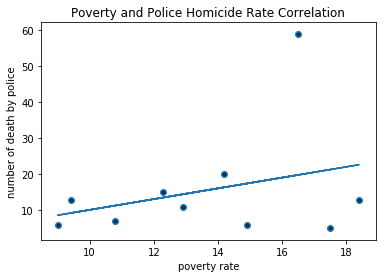

best fit line:
y = -4.75 + 1.49x


0.30632554229988518

In [12]:
import numpy as np
import matplotlib.pyplot as plt
N = 8
#my list for x coordinates
X = [17.5,
9,
16.5,
12.3,
14.2,
12.9,
9.4,
10.8,
18.4,
14.9,]
#list for y coordinates
Y = [5,6,59,15,20,11,13,7,13,6]
#base colors
colors = (0,0,0)
area = np.pi*3
#making a scatter plot
# Plot
plt.scatter(X, Y, s=area, c=colors, alpha=0.5)
#naming my axes
plt.title('Poverty and Police Homicide Rate Correlation')
plt.xlabel('poverty rate')
plt.ylabel('number of death by police')
plt.show()
#finding the line of best fit
def best_fit(X, Y):

    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X) # or len(Y)

    numer = sum([xi*yi for xi,yi in zip(X, Y)]) - n * xbar * ybar
    denum = sum([xi**2 for xi in X]) - n * xbar**2

    b = numer / denum
    a = ybar - b * xbar

    print('best fit line:\ny = {:.2f} + {:.2f}x'.format(a, b))

    return a, b

# solution
a, b = best_fit(X, Y)
#best fit line:
#y = 0.80 + 0.92x

# plot points and fit line
plt.scatter(X, Y)
yfit = [a + b * xi for xi in X]
plt.plot(X, yfit)
np.corrcoef(X, Y)[0, 1]

# Analysis for First Question Dataset

The graph of the relationship between state poverty percentage (X values) and the number of police deaths (Y values) in select cities are pretty clean. The points follow a positive and linear trend. The correlation coefficient which measures how well data fits the line of best-fit is equal to 0.306. This value is not strong at all in terms of statistical analysis. By looking at the graph of the points, it is pretty clear that the relationship is linear. Therefore, I used the right regression model (from Michael). A reason why I see the correlation coefficient not close to 1 is because of the outlier, (16.5,59), maybe if that point was taken away it could be closer to 1. 

In terms of what can be concluded:

- The higher the poverty rate does not guarantee more deaths by police
- The correlation between these two values is very weak, positive, and linear.
- Conjecture: The poverty rate is not the most important factor in the number of police deaths.

# Preparing Dataset for Second Question

In [41]:
#I will be using pandas to isolate my x and y values
#importing pand
import pandas as pd
#finding the file
#getting my items for two of my graphs, my x values
violentcrime = pd.read_csv("Data Files Lab 3/PoliceViolence_city.csv")
print(violentcrime['Violent Crime Rate'])
murderrate = pd.read_csv("Data Files Lab 3/PoliceViolence_city.csv")
print(violentcrime['Murder Rate'])
allpolicedeaths = pd.read_csv("Data Files Lab 3/PoliceViolence_city.csv")
print(violentcrime['All People Killed by Police (2013-2015)'])
#then for my y i will be looking at a range of what shows up

0      8.8
1      3.2
2      8.6
3      4.8
4     12.3
5      4.1
6      4.0
7      4.6
8     13.4
9      9.2
10    15.9
11     7.3
12    12.3
13     1.8
14     5.9
15     4.3
16     8.8
17     2.4
18     9.1
19    13.3
20     4.6
21     5.5
22     6.6
23     6.6
24     6.0
25    19.9
26     7.3
27     3.9
28     3.2
29     5.6
      ... 
70     5.7
71     8.0
72     1.7
73     4.7
74     3.9
75     4.9
76     4.3
77     8.4
78     6.1
79     5.4
80     9.9
81     3.8
82     8.0
83     3.2
84     3.7
85     1.5
86     6.0
87     5.5
88    16.8
89     6.6
90     8.6
91    13.3
92     5.8
93    10.9
94     6.4
95     8.1
96     1.5
97    11.9
98     7.9
99     7.1
Name: Violent Crime Rate, Length: 100, dtype: float64
0      5.4
1      4.0
2      4.0
3      3.4
4     20.5
5      3.1
6      3.5
7      4.6
8     33.8
9     23.1
10    24.5
11     8.1
12    23.2
13     0.4
14     5.5
15     4.3
16    15.1
17     2.7
18    20.2
19    16.2
20     4.5
21    10.0
22     8.5
23     9.1
24     4.7


# Graph for Second Question Dataset (First Part)

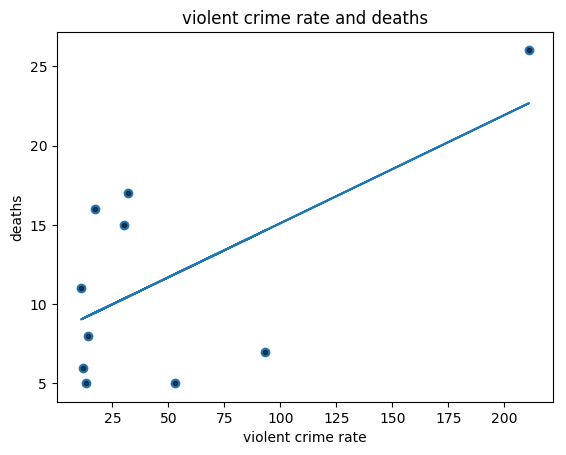

best fit line:
y = 8.29 + 0.07x


0.6239734741282672

In [59]:
import numpy as np
import matplotlib.pyplot as plt
N = 8
#my list for x coordinates
#for my x it will be the violent crime rate
X = [30,
14,
12,
13,
93,
11,
32,
17,
211,
53]
#list for y coordinates
#for y number of people killed
Y = [15,
8,
6,
5,
7,
11,
17,
16,
26,
5]
#base colors
colors = (0,0,0)
area = np.pi*3
#making a scatter plot
# Plot
plt.scatter(X, Y, s=area, c=colors, alpha=0.5)
#naming my axes
plt.title('violent crime rate and deaths')
plt.xlabel('violent crime rate')
plt.ylabel('deaths')
plt.show()
#finding the line of best fit
def best_fit(X, Y):

        xbar = sum(X)/len(X)
        ybar = sum(Y)/len(Y)
        n = len(X) # or len(Y)

        numer = sum([xi*yi for xi,yi in zip(X, Y)]) - n * xbar * ybar
        denum = sum([xi**2 for xi in X]) - n * xbar**2

        b = numer / denum
        a = ybar - b * xbar

        print('best fit line:\ny = {:.2f} + {:.2f}x'.format(a, b))

        return a, b

# solution
a, b = best_fit(X, Y)
#best fit line:
#y = 0.80 + 0.92x

# plot points and fit line
plt.scatter(X, Y)
yfit = [a + b * xi for xi in X]
plt.plot(X, yfit)
np.corrcoef(X, Y)[0, 1]

# Graph for Second Question Dataset (Second Part)

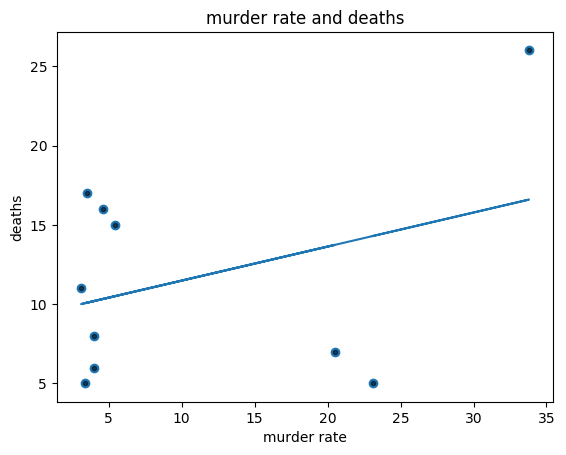

best fit line:
y = 9.34 + 0.21x


0.34739575984125198

In [61]:
import numpy as np
import matplotlib.pyplot as plt
N = 8
#my list for x coordinates
#for my x it will be the violent crime rate
X = [5.4,
4,
4,
3.4,
20.5,
3.1,
3.5,
4.6,
33.8,
23.1]
#list for y coordinates
#for y number of people killed
Y = [15,
8,
6,
5,
7,
11,
17,
16,
26,
5]
#base colors
colors = (0,0,0)
area = np.pi*3
#making a scatter plot
# Plot
plt.scatter(X, Y, s=area, c=colors, alpha=0.5)
#naming my axes
plt.title('murder rate and deaths')
plt.xlabel('murder rate')
plt.ylabel('deaths')
plt.show()
#finding the line of best fit
def best_fit(X, Y):

        xbar = sum(X)/len(X)
        ybar = sum(Y)/len(Y)
        n = len(X) # or len(Y)

        numer = sum([xi*yi for xi,yi in zip(X, Y)]) - n * xbar * ybar
        denum = sum([xi**2 for xi in X]) - n * xbar**2

        b = numer / denum
        a = ybar - b * xbar

        print('best fit line:\ny = {:.2f} + {:.2f}x'.format(a, b))

        return a, b

# solution
a, b = best_fit(X, Y)
#best fit line:
#y = 0.80 + 0.92x

# plot points and fit line
plt.scatter(X, Y)
yfit = [a + b * xi for xi in X]
plt.plot(X, yfit)
np.corrcoef(X, Y)[0, 1]

# Analysis for Second Question Dataset

Part 1: The graph of the relationship between the violent crime rate in cities (X values) and the number of police deaths (Y values) in cities is pretty clean. The points follow a positive and linear trend. The correlation coefficient which measures how well data fits the line of best-fit is equal to 0.624. This value is not strong but still shows some correlation in terms of statistical analysis. But, correlation does not always gurantee causation. By looking at the graph of the points, it is pretty clear that the relationship is linear. Therefore, I used the right regression model (from Michael). The only reason I can visually see as to why r is not closer to 1 are the y values for the x values less than 25.

In terms of what can be concluded:

- The violent crime rate does affect the number of police deaths in some facets
- The correlation between these two values is fairly strong, positive, and linear
- Conjecture: The higher the violent crime rate the higher number of police deaths

Part 2: The graph of the relationship between the murder rate in cities (X values) and the number of police deaths (Y values) in cities is pretty clean. The points follow a positive and linear trend. The correlation coefficient which measures how well data fits the line of best-fit is equal to 0.347. This value is very weak in terms of statistical analysis. But, correlation does not always gurantee causation. By looking at the graph of the points, it is pretty clear that the relationship is linear. Therefore, I used the right regression model (from Michael). The only reason I can visually see as to why r is not closer to 1 are the y values for the x values less than 5.

In terms of what can be concluded:

- The murder crime rate does not affect the number of police deaths
- The correlation between these two values is very weak, positive, and linear
- Conjecture: The murder rate does not correlate to the number of police deaths

# Preparing for Third Question Dataset

In [34]:
#I will be using pandas to isolate my x and y values
#importing pand
import pandas as pd
#finding the file
killed = pd.read_csv("Data Files Lab 3/PoliceViolence_city.csv")
#isolating everyone killed column
print( killed['All People Killed by Police (2013-2015)'])
#now isolating population of africa americans
blackkilled = pd.read_csv("Data Files Lab 3/PoliceViolence_city.csv")
print(blackkilled['Black'])
blackkilled = pd.read_csv("Data Files Lab 3/PoliceViolence_city.csv")
print(blackkilled['Black'])

0     15
1      8
2      6
3      5
4      7
5     11
6     17
7     16
8     26
9      5
10     5
11     7
12     0
13     2
14    11
15     2
16    55
17     1
18    10
19     6
20     3
21    23
22     3
23    28
24    17
25     9
26     5
27    11
28     6
29    15
      ..
70    59
71     5
72     0
73     7
74     4
75     8
76     6
77     3
78     9
79    26
80     9
81    20
82    14
83    12
84    11
85     6
86    15
87     8
88    19
89    10
90     9
91    14
92     6
93     4
94    17
95    11
96     3
97    13
98     7
99     3
Name: All People Killed by Police (2013-2015), Length: 100, dtype: int64
0      14878
1       8209
2      15308
3      67087
4     224316
5      49003
6      60760
7      26677
8     392938
9     124542
10    155258
11    138073
12     97637
13     10580
14    252007
15     65204
16    872286
17      9972
18    132307
19    208208
20     24391
21    217694
22     11912
23    294159
24     58388
25    586573
26     92285
27     18155
28     38514
2

# Graph for Third Question Dataset

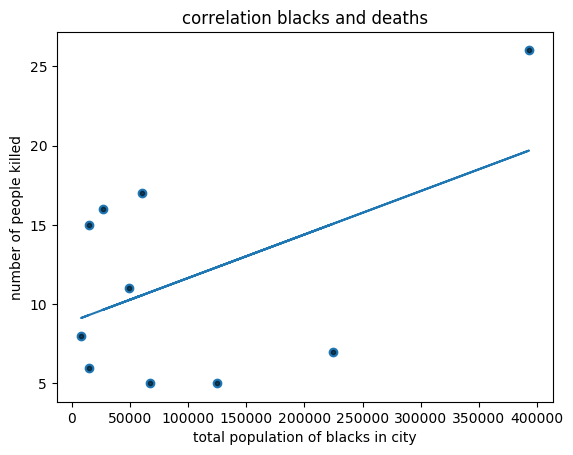

best fit line:
y = 8.90 + 0.00x


0.49235256383047404

In [38]:
import numpy as np
import matplotlib.pyplot as plt
N = 8
#my list for x coordinates
#for my x it will be number of blacks per city
X = [14878,8209,
15308,
67087,
224316,
49003,
60760,
26677,
392938,
124542]
#list for y coordinates
#for y number of people killed
Y = [15,
8,
6,
5,
7,
11,
17,
16,
26,
5]
#base colors
colors = (0,0,0)
area = np.pi*3
#making a scatter plot
# Plot
plt.scatter(X, Y, s=area, c=colors, alpha=0.5)
#naming my axes
plt.title('correlation blacks and deaths')
plt.xlabel('total population of blacks in city')
plt.ylabel('number of people killed')
plt.show()
#finding the line of best fit
def best_fit(X, Y):

    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X) # or len(Y)

    numer = sum([xi*yi for xi,yi in zip(X, Y)]) - n * xbar * ybar
    denum = sum([xi**2 for xi in X]) - n * xbar**2

    b = numer / denum
    a = ybar - b * xbar

    print('best fit line:\ny = {:.2f} + {:.2f}x'.format(a, b))

    return a, b

# solution
a, b = best_fit(X, Y)
#best fit line:
#y = 0.80 + 0.92x

# plot points and fit line
plt.scatter(X, Y)
yfit = [a + b * xi for xi in X]
plt.plot(X, yfit)
np.corrcoef(X, Y)[0, 1]

# Analysis for Third Question Dataset

The graph of the relationship between the number of blacks per city (X values) and the number of police deaths (Y values) in specific cities is pretty clean. The points follow a positive and linear trend. The correlation coefficient which measures how well data fits the line of best-fit is equal to 0.492. This value is fairly weak in terms of statistical analysis, however it is not as low as the other values for my other questions. By looking at the graph of the points, it is pretty clear that the relationship is linear. Therefore, I used the right regression model (from Michael). The only reason I can visually see why r is not closer to 1 are all the outliers, being the only point that is closest to the line of best fit is (49003,11)

In terms of what can be concluded:

- The higher the population of African Americans does not gurantee a higher police death rate
- The correlation between these two values is fairly weak, positive, and linear
- Conjecture: The population of African Americans does not correlate to the number of police deaths

# Conclusion

Conclusions including answers to the three essential questions:
    
- The higher a poverty rate does not correlate with a higher death rate by police
- Conjecture: Poverty, murder rate, and population of African Americans does not affect death by police rate.
- The one that showed the most correlation was the violent crime rate and the death by police number

- Further exploration questions? 

1.Do body cameras correlate to police deaths?

2.Does the number of policemen dying relate to deaths by police?

3.How many cases, police deaths, make it to national television?

# Acknowledgements

- Michael Gary, thanks again for giving me some ideas
- thank you to some reputable sources from Doctor Google who helped me understand the code
- thank you Ms.Sconyers for providing the necessary resources for me to finish the lab
- Mahir also sent me some tips and code